In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 

/tmp/ipykernel_5707/776920745.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
data = pd.read_csv('Ads_CTR_Optimisation.csv')

In [3]:
data

,Ad 1,Ad 2,Ad 3,Ad 4,Ad 5,Ad 6,Ad 7,Ad 8,Ad 9,Ad 10
0,1,0,0,0,1,0,0,0,1,0
1,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
9995,0,0,1,0,0,0,0,1,0,0
9996,0,0,0,0,0,0,0,0,0,0
9997,0,0,0,0,0,0,0,0,0,0
9998,1,0,0,0,0,0,0,1,0,0


In [5]:
import math
N=10000
D=10
ads_selected=[]
numbers_of_selections = [0]*D
sums_of_rewards=[0]*D
total_reward=0
for n in range(0,N):
    ad = 0
    max_upper_bound=0
    for i in range(0,D):
        if numbers_of_selections[i]>0:
            average_reward = sums_of_rewards[i]/numbers_of_selections[i]
            delta_i = math.sqrt(3/2 * math.log(n+1)/numbers_of_selections[i])
            upper_bound=average_reward+delta_i
        else:
            upper_bound = 1e400
        if upper_bound > max_upper_bound:
            max_upper_bound = upper_bound
            ad = i 
    ads_selected.append(ad)
    numbers_of_selections[ad]+=1
    reward = data.values[n,ad]
    sums_of_rewards[ad] += reward
    total_reward = total_reward + reward

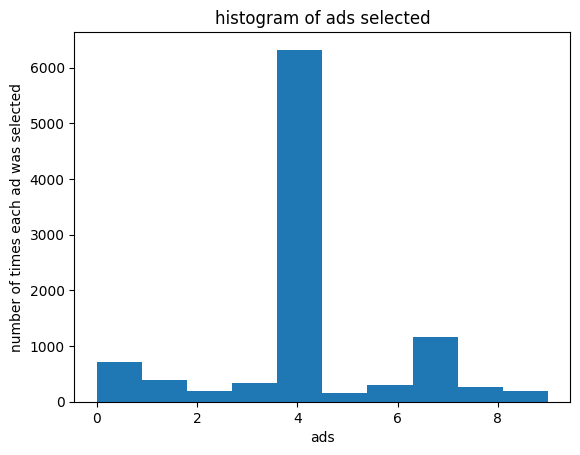

In [6]:
plt.hist(ads_selected)
plt.title('histogram of ads selected')
plt.xlabel('ads')
plt.ylabel('number of times each ad was selected')
plt.show()